In [1]:
#imports
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.preprocessing.image import img_to_array, array_to_img

import pathlib

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense


In [2]:
class_names = ['NonDemented', 'Demented']
num_classes = len(class_names)
batch_size = 64
input_shape = (208, 176, 3)
AUTOTUNE = tf.data.experimental.AUTOTUNE

def one_hot_label(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

Found 5121 files belonging to 2 classes.
Found 1279 files belonging to 2 classes.


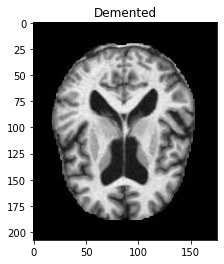

In [31]:
train_dir = pathlib.Path('../Project/Alzheimer_s Dataset_binary/train')
test_dir = pathlib.Path('../Project/Alzheimer_s Dataset_binary/test')

train_dataset = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        class_names=class_names,
        batch_size=batch_size,
        image_size=input_shape[0:2])

test_dataset = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        labels='inferred',
        class_names=class_names,
        batch_size=batch_size,
        image_size=input_shape[0:2])

for images, labels, in train_dataset.take(1):
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.title(class_names[labels[0]])
    
train_dataset = train_dataset.map(one_hot_label, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(one_hot_label, num_parallel_calls=AUTOTUNE)

In [45]:
#attemping to flip dataset

test_set = tf.data.Dataset.from_tensor_slices(tf.range(0,10))

print(tf.image(test_set))


TypeError: 'module' object is not callable